In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
%matplotlib inline
from astropy.time import Time
import palettable
from matplotlib import rc
rc('text', usetex=True)
font = {'family' : 'serif',
        'weight' : 'bold',
        'size'   : '14'}
rc('font', **font)
from scipy.stats import spearmanr
from scipy.stats import pearsonr
from scipy.optimize import curve_fit
import pandas
from astropy.time import Time


In [41]:
df = pandas.read_csv('data.csv')
dfw = pandas.read_csv('weather.csv')


In [42]:
len(dfw['Local_TimeStamp'])

54

In [43]:

def switchtimefmt(intimes=dfw['Local_TimeStamp']):
    newtimes=([])
    for j in range(0, len(intimes)):
        if np.shape(newtimes)<1:
            newtimes=pandas.Timestamp(intimes[j])
        else:
            newtimes=np.append(newtimes, pandas.Timestamp(intimes[j]))
    formatted_time = Time((newtimes),format='datetime').isot

    t = Time(formatted_time, format='isot')
    t_mjd= t.mjd
    return t_mjd


In [44]:
newtimes=switchtimefmt()
newtimes_data=switchtimefmt(intimes=df['Local_TimeStamp'])

data_t_days=newtimes_data-newtimes_data[0]
weather_t_days=newtimes-newtimes[0]

In [45]:
t_cel=(df['Temperature']-32.0)*(5.0/9.0)
w_cel=(dfw['Temperature']-32.0)*(5.0/9.0)


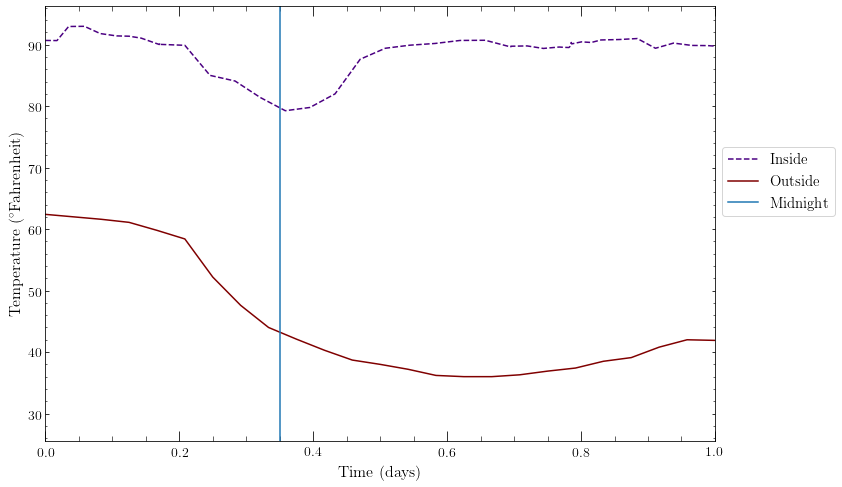

In [46]:

plt.figure(figsize=(12,8))
plt.plot(newtimes_data-newtimes_data[0], df['Temperature'], '--', color='indigo', label='Inside')
plt.plot(newtimes-newtimes[0], dfw['Temperature'], color='maroon', label='Outside')
plt.tick_params(axis='y', which='both',direction='in',right='on', top='on') 
plt.tick_params(axis='x', which='both',direction='in',right='on', top='on') 
plt.minorticks_on()  
plt.tick_params(axis='x', which='major', length=10)        # To set tick size
plt.tick_params(axis='x', which='minor', length=5) 
plt.axvline(x=0.35, label='Midnight')
plt.ylabel('Temperature ($^{\circ}$Fahrenheit)', fontsize=16)
plt.legend(bbox_to_anchor=(1, 0.5),loc=3,numpoints=1,fontsize=15)
plt.xlim(0,1)
plt.xlabel('Time (days)', fontsize=16)
plt.savefig('day1.png', bbox_inches='tight')

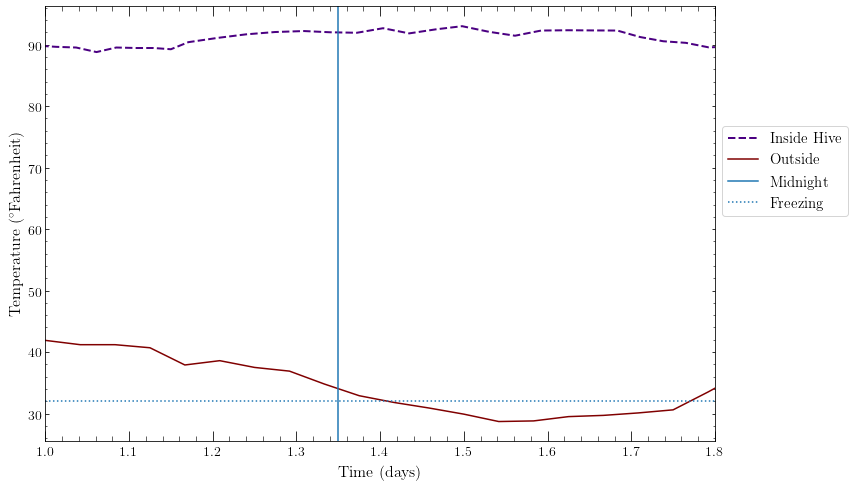

In [47]:

plt.figure(figsize=(12,8))
plt.plot(newtimes_data-newtimes_data[0], df['Temperature'], '--', linewidth=2,color='indigo', label='Inside Hive')
plt.plot(newtimes-newtimes[0], dfw['Temperature'], color='maroon', label='Outside')
plt.tick_params(axis='y', which='both',direction='in',right='on', top='on') 
plt.tick_params(axis='x', which='both',direction='in',right='on', top='on') 
plt.minorticks_on()  
plt.tick_params(axis='x', which='major', length=10)        # To set tick size
plt.tick_params(axis='x', which='minor', length=5) 
plt.axvline(x=1.35, label='Midnight')
plt.axhline(y=32,  ls=':',label='Freezing')
#plt.axhline(y=92, label='Target Temp')

plt.ylabel('Temperature ($^{\circ}$Fahrenheit)', fontsize=16)
plt.legend(bbox_to_anchor=(1, 0.5),loc=3,numpoints=1,fontsize=15)

plt.xlim(1,1.8)
plt.xlabel('Time (days)', fontsize=16)
plt.savefig('day2.png', bbox_inches='tight')

In [48]:
from astropy.stats import LombScargle

In [49]:
print data_t_days.shape

##need to sample appropriately!

(87,)


In [50]:
vFreqs=np.linspace(0.5, 100, 2000)
vPowers=LombScargle(data_t_days, df['Temperature']).power(vFreqs)
vPowers_h=LombScargle(data_t_days, df['Humidity']).power(vFreqs)

vPowers_t_w=LombScargle(weather_t_days, dfw['Temperature']).power(vFreqs)


/home/kcdage/anaconda2/lib/python2.7/site-packages/matplotlib/axes/_base.py:3157: UserWarning: Attempted to set non-positive xlimits for log-scale axis; invalid limits will be ignored.
  'Attempted to set non-positive xlimits for log-scale axis; '


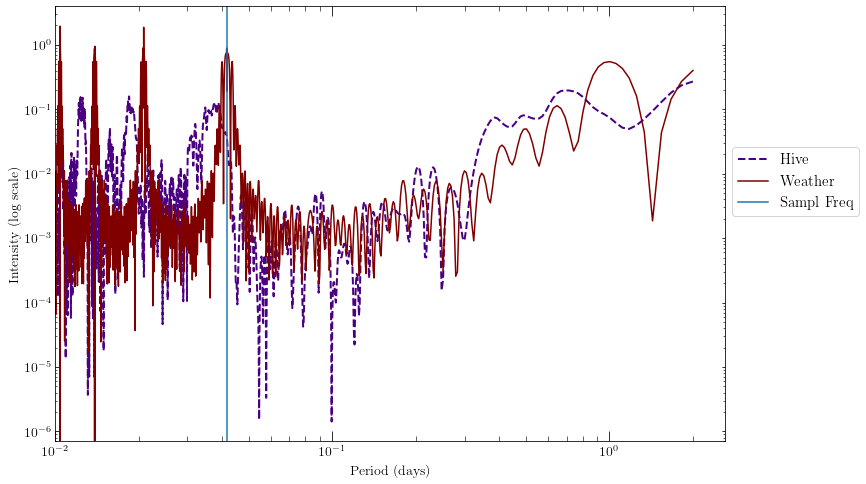

In [54]:
plt.figure(figsize=(12,8))

plt.loglog(1.0/vFreqs, vPowers,'--', linewidth=2,color='indigo', label='Hive')
plt.loglog(1.0/vFreqs, vPowers_t_w,  color='maroon',label='Weather')

plt.axvline(x=0.0416, label='Sampl Freq (1 hour)')

plt.legend(bbox_to_anchor=(1, 0.5),loc=3,numpoints=1,fontsize=15)

plt.xlim(0.)
plt.tick_params(axis='y', which='both',direction='in',right='on', top='on') 
plt.tick_params(axis='x', which='both',direction='in',right='on', top='on') 
plt.minorticks_on()  
plt.tick_params(axis='x', which='major', length=10)        # To set tick size
plt.tick_params(axis='x', which='minor', length=5) 
plt.xlabel('Period (days)')
plt.ylabel('Intensity (log scale)')
plt.savefig('badLS.png', bbox_inches='tight')

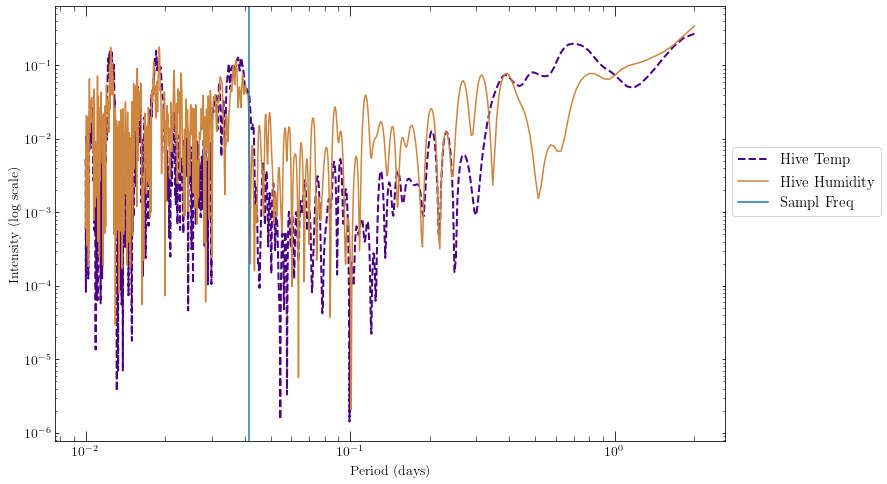

In [52]:
plt.figure(figsize=(12,8))

plt.loglog(1.0/vFreqs, vPowers,'--', linewidth=2,color='indigo', label='Hive Temp')
plt.loglog(1.0/vFreqs, vPowers_h,  color='peru',label='Hive Humidity')

plt.axvline(x=0.0416, label='Sample Freq (1 hour)')

plt.legend(bbox_to_anchor=(1, 0.5),loc=3,numpoints=1,fontsize=15)


plt.tick_params(axis='y', which='both',direction='in',right='on', top='on') 
plt.tick_params(axis='x', which='both',direction='in',right='on', top='on') 
plt.minorticks_on()  
plt.tick_params(axis='x', which='major', length=10)        # To set tick size
plt.tick_params(axis='x', which='minor', length=5) 
plt.xlabel('Period (days)')
plt.ylabel('Intensity (log scale)')
plt.savefig('badLS2.png', bbox_inches='tight')